#1. What are your steps in cleaning the dataset? Why did you choose the algorithm that you used in cleaning the dataset?

Step 1: Load the Dataset

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("train.csv")

# Display first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Step 2: Data Cleaning
Handling Missing Values

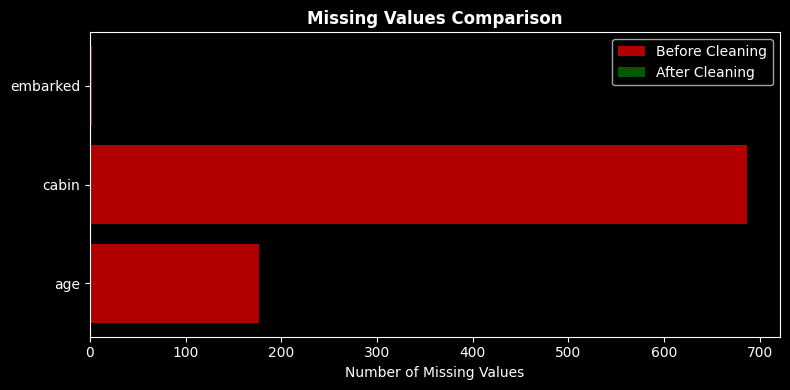

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set a dark theme for better contrast
plt.style.use("dark_background")

# Load the dataset
df = pd.read_csv("train.csv")

# Standardize column names (convert to lowercase and remove spaces)
df.columns = df.columns.str.strip().str.lower()

# Create a copy of the original dataset for comparison
df_before = df.copy()

# Data Cleaning Steps
df["age"] = df["age"].fillna(df["age"].median())  # Fill missing 'age' values with median
df = df.drop(columns=["cabin"])  # Drop 'cabin' column due to too many missing values
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])  # Fill missing 'embarked' values with mode

# Count missing values before and after
missing_before = df_before.isnull().sum()
missing_after = df.isnull().sum()

# Filter only columns that had missing values
missing_data = pd.DataFrame({"Before Cleaning": missing_before, "After Cleaning": missing_after})
missing_data = missing_data[missing_data["Before Cleaning"] > 0]  # Show only relevant columns

# If missing values exist, plot only the bar chart
if not missing_data.empty:
    fig, ax = plt.subplots(figsize=(8, 4))

    # Bar Chart of Missing Values
    x = np.arange(len(missing_data))
    ax.barh(missing_data.index, missing_data["Before Cleaning"], color="red", alpha=0.7, label="Before Cleaning")
    ax.barh(missing_data.index, missing_data["After Cleaning"], color="green", alpha=0.7, label="After Cleaning")

    ax.set_xlabel("Number of Missing Values")
    ax.set_title("Missing Values Comparison", fontsize=12, fontweight="bold")
    ax.legend()

    plt.tight_layout()
    plt.show()
else:
    print("\n✅ No missing values detected after cleaning! 🎉")


Removing Duplicates

In [72]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)


Fixing Data Types

In [75]:
# Standardize column names (convert to lowercase and remove spaces)
df.columns = df.columns.str.strip().str.lower()

# Convert 'survived' and 'pclass' to categorical (case-insensitive)
df["survived"] = df["survived"].astype("category")
df["pclass"] = df["pclass"].astype("category")


Standardizing Column Names

In [76]:
# Convert all column names to lowercase
df.columns = df.columns.str.lower()


Step 3: Save Cleaned Dataset

In [77]:
# Save the cleaned dataset
df.to_csv("titanic_cleaned.csv", index=False)

print("Dataset cleaned and saved as titanic_cleaned.csv")


Dataset cleaned and saved as titanic_cleaned.csv


Step 4: Basic Data Analysis
Convert Categorical Columns Back to Numeric for Analysis

In [78]:
# Convert categorical columns back to numeric for analysis
df["survived"] = df["survived"].astype(int)
df["pclass"] = df["pclass"].astype(int)


#2. Create at least two (2) basic data analysis on two (2) columns in the dataset. Be creative and critical in deriving the insights on the data. You can show the visualization used to derive the insights.

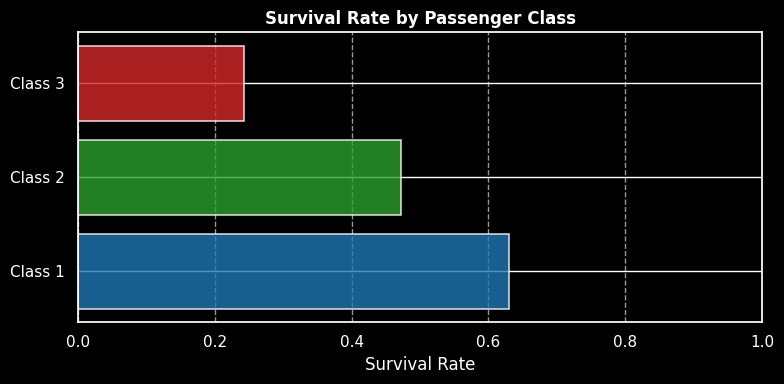

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Set a dark theme for better contrast
plt.style.use("dark_background")

# Define colors
colors = ["#1f77b4", "#2ca02c", "#d62728"]  # Blue, Green, Red

# Get survival rates per class
survival_rates = df.groupby("pclass")["survived"].mean()

# Create figure with custom size
fig, ax = plt.subplots(figsize=(8, 4))

# Bar chart (horizontal like Missing Values Chart)
y_pos = np.arange(len(survival_rates.index))
ax.barh(y_pos, survival_rates, color=colors, alpha=0.8, edgecolor="white", linewidth=1.2)

# Labeling
ax.set_yticks(y_pos)
ax.set_yticklabels([f"Class {int(cls)}" for cls in survival_rates.index])
ax.set_xlabel("Survival Rate")
ax.set_title("Survival Rate by Passenger Class", fontsize=12, fontweight="bold")

# Set limits for better visualization
ax.set_xlim(0, 1)  # Survival rate ranges from 0 to 1
ax.grid(axis="x", linestyle="--", alpha=0.6)

# Show the final chart
plt.tight_layout()
plt.show()


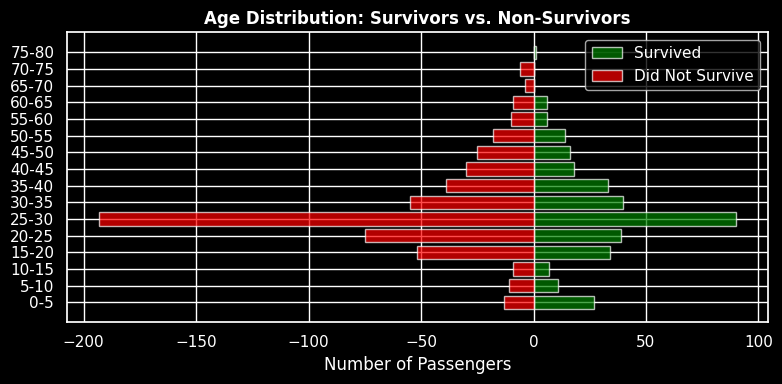

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set a dark theme for better contrast
plt.style.use("dark_background")

# Define age bins
bins = np.arange(0, 81, 5)  # Age groups (0-5, 5-10, ..., 75-80)
survived_counts, _ = np.histogram(df[df["survived"] == 1]["age"], bins=bins)
not_survived_counts, _ = np.histogram(df[df["survived"] == 0]["age"], bins=bins)

# Define y-axis labels for age groups
age_labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins) - 1)]

# Create figure with custom size
fig, ax = plt.subplots(figsize=(8, 4))

# Bar chart of survivors vs non-survivors by age
y_pos = np.arange(len(age_labels))
ax.barh(y_pos, survived_counts, color="green", alpha=0.7, label="Survived")
ax.barh(y_pos, -not_survived_counts, color="red", alpha=0.7, label="Did Not Survive")

# Labeling
ax.set_yticks(y_pos)
ax.set_yticklabels(age_labels)
ax.set_xlabel("Number of Passengers")
ax.set_title("Age Distribution: Survivors vs. Non-Survivors", fontsize=12, fontweight="bold")
ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()
